In [1]:
import numpy as np 
import pandas as pd 

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_data=pd.read_csv(r'C:\Users\MSA\Desktop\exercise of ML amirkabir\ML_HW2\train.csv')

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
total = train_data.isnull().sum().sort_values(ascending=False)
percent_1 = train_data.isnull().sum()/train_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


# Preprocessing

In [8]:
train_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Male')

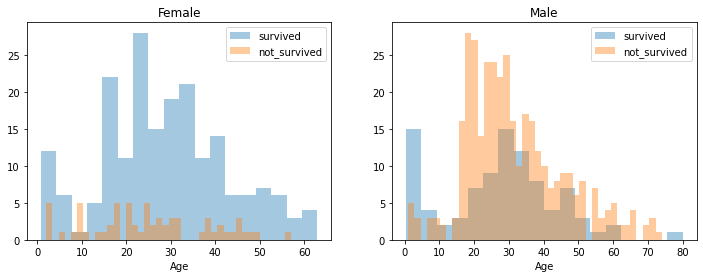

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 4))
women = train_data[train_data['Sex']=='female']
men = train_data[train_data['Sex']=='male']
hist_women = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[0], kde =False)
hist_women = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[0], kde =False)
hist_women.legend()
hist_women.set_title('Female')
hist_men = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = 'survived', ax = axes[1], kde = False)
hist_men = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'not_survived', ax = axes[1], kde = False)
hist_men.legend()
hist_men.set_title('Male')

In [10]:
train_data.dropna(subset=['Embarked'],inplace=True)


In [11]:
dic={'Sex':train_data['Sex'],'Age':train_data['Age'],'Pclass':train_data['Pclass'],'SibSp':train_data['SibSp']
     ,'Parch':train_data['Parch'],'Fare':train_data['Fare'],
     'Embarked':train_data['Embarked'],'Survived':train_data['Survived']}
df=pd.DataFrame(dic)

In [12]:
df

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked,Survived
0,male,22.0,3,1,0,7.2500,S,0
1,female,38.0,1,1,0,71.2833,C,1
2,female,26.0,3,0,0,7.9250,S,1
3,female,35.0,1,1,0,53.1000,S,1
4,male,35.0,3,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...
886,male,27.0,2,0,0,13.0000,S,0
887,female,19.0,1,0,0,30.0000,S,1
888,female,NaN,3,1,2,23.4500,S,0
889,male,26.0,1,0,0,30.0000,C,1


In [13]:
df['Embarked'].unique()
dic_Embarked={}
for i in range(len(df['Embarked'].unique())):
    dic_Embarked[df['Embarked'].unique()[i]]=i

In [14]:
for i in df.index:
    if df.loc[i,'Sex']=='male':
        df.loc[i,'Sex']=1  
    else:
         df.loc[i,'Sex']=0

for i in df.index:
    if df.loc[i,'Embarked']==list(dic_Embarked.keys())[0]:
        df.loc[i,'Embarked']=list(dic_Embarked.values())[0]  
        
    if df.loc[i,'Embarked']==list(dic_Embarked.keys())[1]:
        df.loc[i,'Embarked']=list(dic_Embarked.values())[1] 
        
    if df.loc[i,'Embarked']==list(dic_Embarked.keys())[2]:
        df.loc[i,'Embarked']=list(dic_Embarked.values())[2]      

In [15]:
df

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked,Survived
0,1,22.0,3,1,0,7.2500,0,0
1,0,38.0,1,1,0,71.2833,1,1
2,0,26.0,3,0,0,7.9250,0,1
3,0,35.0,1,1,0,53.1000,0,1
4,1,35.0,3,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
886,1,27.0,2,0,0,13.0000,0,0
887,0,19.0,1,0,0,30.0000,0,1
888,0,NaN,3,1,2,23.4500,0,0
889,1,26.0,1,0,0,30.0000,1,1


# missing value

In [16]:
df['Sex'] = pd.to_numeric(df.Sex, errors='coerce')
df['Embarked'] = pd.to_numeric(df.Embarked, errors='coerce')

In [17]:
mean_Age=df['Age'].mean()
std = df["Age"].std()
number_nan = df["Age"].isnull().sum()

In [18]:
df['Age'].fillna('Nan',inplace=True)

In [19]:
for i in df.index:
    if df.loc[i,'Age']=='Nan':
        rand_age = np.random.randint(mean_Age - std, mean_Age + std)
        df.loc[i,'Age']=rand_age
    

<AxesSubplot:>

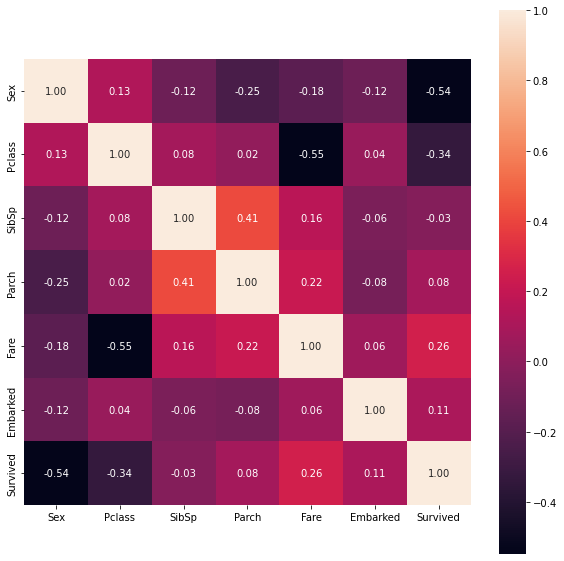

In [20]:
plt.figure(figsize=(10,10))

sns.heatmap(df.corr(),cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 
                 )

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


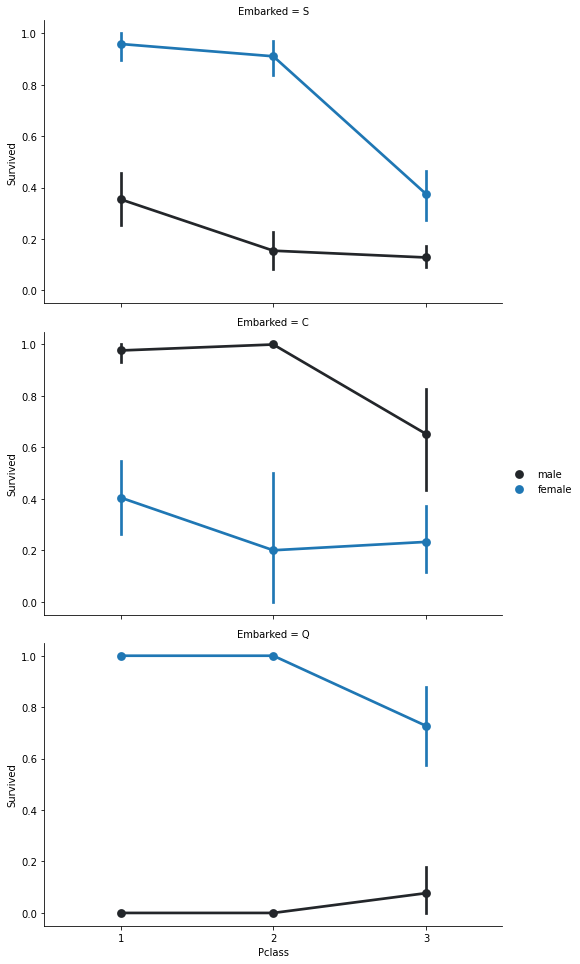

In [21]:
FacetGrid = sns.FacetGrid(train_data, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

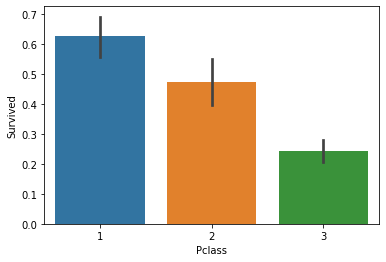

In [22]:
sns.barplot(x='Pclass', y='Survived', data=train_data)

D:\Users\MSA\anaconda3\envs\ad\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


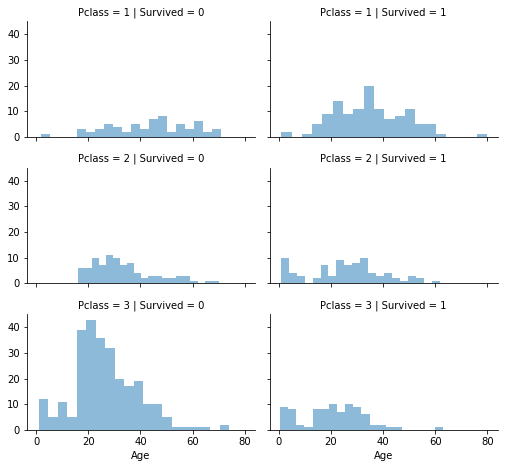

In [23]:
grid = sns.FacetGrid(train_data, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scale= StandardScaler()

In [26]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [27]:
X = scale.fit_transform(X) 
print(X)

[[ 0.73534203 -0.54715354  0.82520863 ... -0.47432585 -0.50023975
  -0.56968402]
 [-1.35991138  0.63667832 -1.57221121 ... -0.47432585  0.78894661
   1.00313924]
 [-1.35991138 -0.25119557  0.82520863 ... -0.47432585 -0.48664993
  -0.56968402]
 ...
 [-1.35991138  0.71066781  0.82520863 ...  2.00611934 -0.17408416
  -0.56968402]
 [ 0.73534203 -0.25119557 -1.57221121 ... -0.47432585 -0.0422126
   1.00313924]
 [ 0.73534203  0.19274138  0.82520863 ... -0.47432585 -0.49017322
   2.5759625 ]]


# Train Data

In [28]:
calss_dic={'Survived': 1, 'not_Survived': 1}

In [29]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X, y)
y_pred = sgd.predict(X)
sgd.score(X, y)
acc_sgd = round(sgd.score(X, y) * 100, 2)

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       549
           1       0.74      0.65      0.69       340

    accuracy                           0.78       889
   macro avg       0.77      0.76      0.76       889
weighted avg       0.78      0.78      0.78       889



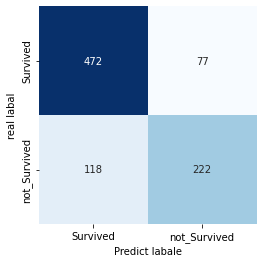

In [30]:
mat=confusion_matrix(y,y_pred)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y,y_pred))

In [31]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)

y_pred = random_forest.predict(X)

random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X, y) * 100, 2)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       549
           1       0.99      0.97      0.98       340

    accuracy                           0.98       889
   macro avg       0.99      0.98      0.98       889
weighted avg       0.98      0.98      0.98       889



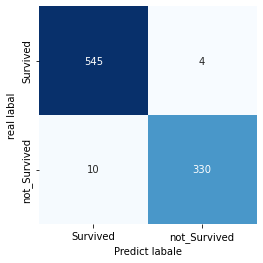

In [32]:
mat=confusion_matrix(y,y_pred)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y,y_pred))

In [33]:
logreg = LogisticRegression()
logreg.fit(X, y)

y_pred = logreg.predict(X)

acc_log = round(logreg.score(X, y) * 100, 2)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       549
           1       0.77      0.71      0.74       340

    accuracy                           0.81       889
   macro avg       0.80      0.79      0.79       889
weighted avg       0.81      0.81      0.81       889



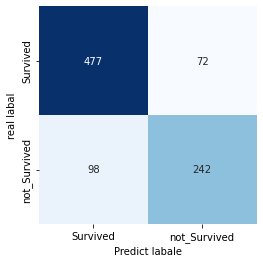

In [34]:
mat=confusion_matrix(y,y_pred)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y,y_pred))

In [35]:
gaussian = GaussianNB()
gaussian.fit(X, y)
y_pred = gaussian.predict(X)
acc_gaussian = round(gaussian.score(X, y) * 100, 2)

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       549
           1       0.74      0.71      0.72       340

    accuracy                           0.79       889
   macro avg       0.78      0.78      0.78       889
weighted avg       0.79      0.79      0.79       889



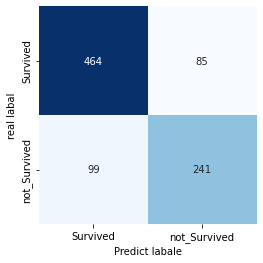

In [36]:
mat=confusion_matrix(y,y_pred)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y,y_pred))

In [37]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X, y) 
y_pred = decision_tree.predict(X)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       549
           1       1.00      0.96      0.98       340

    accuracy                           0.98       889
   macro avg       0.99      0.98      0.98       889
weighted avg       0.98      0.98      0.98       889



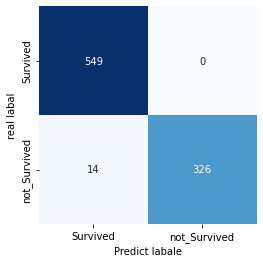

In [38]:
mat=confusion_matrix(y,y_pred)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y,y_pred))

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, y)
y_pred = lda.predict(X)
acc_lda = round(lda.score(X, y) * 100, 2)

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       549
           1       0.77      0.70      0.73       340

    accuracy                           0.80       889
   macro avg       0.80      0.78      0.79       889
weighted avg       0.80      0.80      0.80       889



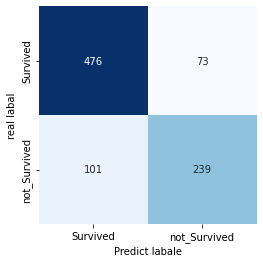

In [41]:
mat=confusion_matrix(y,y_pred)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y,y_pred))

In [42]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [43]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, y)
y_pred = qda.predict(X)
acc_qda = round(qda.score(X, y) * 100, 2)

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       549
           1       0.78      0.70      0.73       340

    accuracy                           0.81       889
   macro avg       0.80      0.79      0.79       889
weighted avg       0.81      0.81      0.81       889



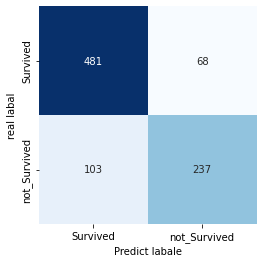

In [44]:
mat=confusion_matrix(y,y_pred)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y,y_pred))

In [45]:
KNeighbors = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
KNeighbors.fit(X, y)
y_pred = KNeighbors.predict(X)
acc_KNeighbors = round(KNeighbors.score(X, y) * 100, 2)

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       549
           1       1.00      0.69      0.82       340

    accuracy                           0.88       889
   macro avg       0.92      0.85      0.87       889
weighted avg       0.90      0.88      0.88       889



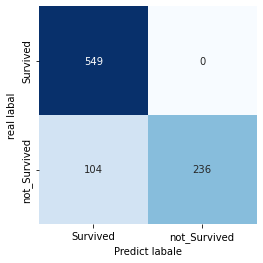

In [46]:
mat=confusion_matrix(y,y_pred)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y,y_pred))

In [47]:
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X, y)
y_pred = svclassifier.predict(X)
acc_svclassifier = round(svclassifier.score(X, y) * 100, 2)

              precision    recall  f1-score   support

           0       0.83      0.95      0.88       549
           1       0.90      0.68      0.77       340

    accuracy                           0.85       889
   macro avg       0.86      0.82      0.83       889
weighted avg       0.85      0.85      0.84       889



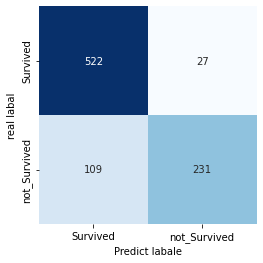

In [48]:
mat=confusion_matrix(y,y_pred)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y,y_pred))

In [49]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree','LinearDiscriminantAnalysis',
              'QuadraticDiscriminantAnalysis','KNeighborsClassifier','svclassifier'],
    'Score': [ acc_log, 
              acc_random_forest, acc_gaussian, 
              acc_sgd, acc_decision_tree,acc_lda,acc_qda,acc_KNeighbors,acc_svclassifier]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
98.43,Random Forest
98.43,Decision Tree
88.30,KNeighborsClassifier
84.70,svclassifier
80.88,Logistic Regression
80.76,QuadraticDiscriminantAnalysis
80.43,LinearDiscriminantAnalysis
79.30,Naive Bayes
78.07,Stochastic Gradient Decent


# Test Data

In [50]:
test_data=pd.read_csv(r'C:\Users\MSA\Desktop\exercise of ML amirkabir\ML_HW2\test.csv')

In [51]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


In [52]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [53]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.363636
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.481622
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000


In [54]:
total = test_data.isnull().sum().sort_values(ascending=False)
percent_1 = test_data.isnull().sum()/test_data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(9)

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [55]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [56]:
test_data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [57]:
dic={'Sex':test_data['Sex'],'Age':test_data['Age'],'Pclass':test_data['Pclass'],'SibSp':test_data['SibSp']
     ,'Parch':test_data['Parch'],'Fare':test_data['Fare'],
     'Embarked':test_data['Embarked'],'Survived':test_data['Survived']}
df_test=pd.DataFrame(dic)

In [58]:
df_test

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked,Survived
0,male,34.5,3,0,0,7.8292,Q,0
1,female,47.0,3,1,0,7.0000,S,1
2,male,62.0,2,0,0,9.6875,Q,0
3,male,27.0,3,0,0,8.6625,S,0
4,female,22.0,3,1,1,12.2875,S,1
...,...,...,...,...,...,...,...,...
413,male,NaN,3,0,0,8.0500,S,0
414,female,39.0,1,0,0,108.9000,C,1
415,male,38.5,3,0,0,7.2500,S,0
416,male,NaN,3,0,0,8.0500,S,0


In [59]:
df_test['Embarked'].unique()
dic_Embarked={}
for i in range(len(df_test['Embarked'].unique())):
    dic_Embarked[df_test['Embarked'].unique()[i]]=i

In [60]:
for i in df_test.index:
    if df_test.loc[i,'Sex']=='male':
        df_test.loc[i,'Sex']=1  
    else:
         df_test.loc[i,'Sex']=0

for i in df_test.index:
    if df_test.loc[i,'Embarked']==list(dic_Embarked.keys())[0]:
        df_test.loc[i,'Embarked']=list(dic_Embarked.values())[0]  
        
    if df_test.loc[i,'Embarked']==list(dic_Embarked.keys())[1]:
        df_test.loc[i,'Embarked']=list(dic_Embarked.values())[1] 
        
    if df_test.loc[i,'Embarked']==list(dic_Embarked.keys())[2]:
        df_test.loc[i,'Embarked']=list(dic_Embarked.values())[2]      

In [61]:
df_test

,Sex,Age,Pclass,SibSp,Parch,Fare,Embarked,Survived
0,1,34.5,3,0,0,7.8292,0,0
1,0,47.0,3,1,0,7.0000,1,1
2,1,62.0,2,0,0,9.6875,0,0
3,1,27.0,3,0,0,8.6625,1,0
4,0,22.0,3,1,1,12.2875,1,1
...,...,...,...,...,...,...,...,...
413,1,NaN,3,0,0,8.0500,1,0
414,0,39.0,1,0,0,108.9000,2,1
415,1,38.5,3,0,0,7.2500,1,0
416,1,NaN,3,0,0,8.0500,1,0


In [62]:
mean_Age=df_test['Age'].mean()
std = df_test["Age"].std()
number_nan = df_test["Age"].isnull().sum()
mean_fare=df_test['Fare'].mean()

In [63]:
df_test['Age'].fillna('Nan',inplace=True)
df_test['Fare'].fillna('Nan',inplace=True)

In [64]:
for i in df_test.index:
    if df_test.loc[i,'Age']=='Nan':
        rand_age = np.random.randint(mean_Age - std, mean_Age + std)
        df_test.loc[i,'Age']=rand_age
for i in df_test.index:
    if df_test.loc[i,'Fare']=='Nan':
        df_test.loc[i,'Fare']=mean_fare
        

In [65]:
df_test['Sex'] = df_test['Sex'].map(lambda x: float(x))
df_test['Age'] = df_test['Age'].map(lambda x: float(x))
df_test['Fare'] = df_test['Fare'].map(lambda x: float(x))
df_test['Embarked'] = df_test['Embarked'].map(lambda x: float(x))

In [66]:
X_test=df_test.iloc[:,:-1]
y_test=df_test.iloc[:,-1]
scale= StandardScaler()

In [67]:
X_test=scale.fit_transform(X_test)

In [68]:
y_pred_test = sgd.predict(X_test)
acc_sgd_test = round(sgd.score(X_test, y_test) * 100, 2)

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       266
           1       0.84      0.77      0.80       152

    accuracy                           0.86       418
   macro avg       0.86      0.84      0.85       418
weighted avg       0.86      0.86      0.86       418



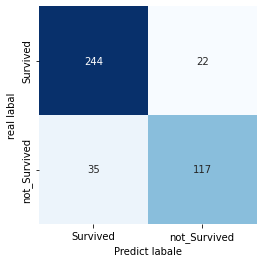

In [69]:
mat=confusion_matrix(y_test,y_pred_test)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y_test,y_pred_test))

In [70]:
y_pred_test = random_forest.predict(X_test)
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       266
           1       0.84      0.80      0.82       152

    accuracy                           0.87       418
   macro avg       0.86      0.86      0.86       418
weighted avg       0.87      0.87      0.87       418



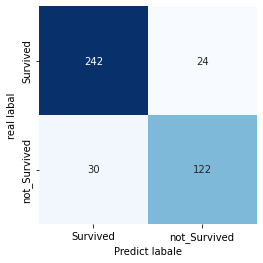

In [71]:
mat=confusion_matrix(y_test,y_pred_test)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y_test,y_pred_test))

In [72]:
y_pred_test = logreg.predict(X_test)
acc_logreg_test = round(logreg.score(X_test, y_test) * 100, 2)

              precision    recall  f1-score   support

           0       0.91      0.94      0.93       266
           1       0.90      0.84      0.87       152

    accuracy                           0.91       418
   macro avg       0.90      0.89      0.90       418
weighted avg       0.91      0.91      0.91       418



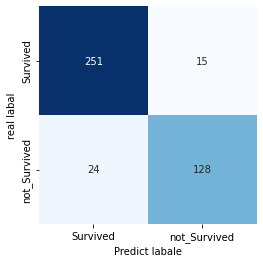

In [73]:
mat=confusion_matrix(y_test,y_pred_test)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y_test,y_pred_test))

In [74]:
y_pred_test = gaussian.predict(X_test)
acc_gaussian_test = round(gaussian.score(X_test, y_test) * 100, 2)

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       266
           1       0.86      0.94      0.90       152

    accuracy                           0.92       418
   macro avg       0.91      0.93      0.92       418
weighted avg       0.93      0.92      0.92       418



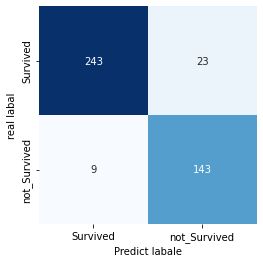

In [75]:
mat=confusion_matrix(y_test,y_pred_test)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y_test,y_pred_test))

In [76]:
y_pred_test = decision_tree.predict(X_test)
acc_decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       266
           1       0.75      0.78      0.76       152

    accuracy                           0.83       418
   macro avg       0.81      0.81      0.81       418
weighted avg       0.83      0.83      0.83       418



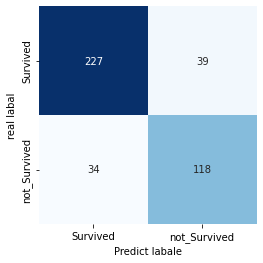

In [77]:
mat=confusion_matrix(y_test,y_pred_test)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y_test,y_pred_test))

In [78]:
y_pred_test = lda.predict(X_test)
acc_lda_test = round(lda.score(X_test, y_test) * 100, 2)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       266
           1       0.95      0.91      0.93       152

    accuracy                           0.95       418
   macro avg       0.95      0.94      0.95       418
weighted avg       0.95      0.95      0.95       418



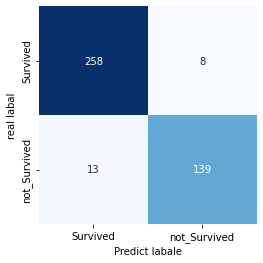

In [79]:
mat=confusion_matrix(y_test,y_pred_test)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y_test,y_pred_test))

In [80]:
y_pred_test = qda.predict(X_test)
acc_qda_test = round(qda.score(X_test, y_test) * 100, 2)

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       266
           1       0.85      0.75      0.80       152

    accuracy                           0.86       418
   macro avg       0.86      0.84      0.85       418
weighted avg       0.86      0.86      0.86       418



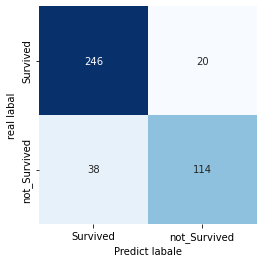

In [81]:
mat=confusion_matrix(y_test,y_pred_test)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y_test,y_pred_test))

In [82]:
y_pred_test = KNeighbors.predict(X_test)
acc_KNeighbors_test = round(KNeighbors.score(X_test, y_test) * 100, 2)

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       266
           1       0.75      0.59      0.66       152

    accuracy                           0.78       418
   macro avg       0.77      0.74      0.75       418
weighted avg       0.78      0.78      0.77       418



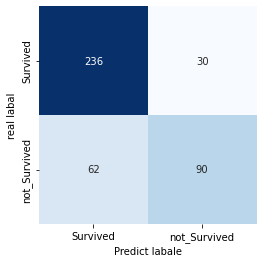

In [83]:
mat=confusion_matrix(y_test,y_pred_test)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y_test,y_pred_test))

In [84]:
y_pred_test = svclassifier.predict(X_test)
acc_svclassifier_test = round(svclassifier.score(X_test, y_test) * 100, 2)

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       266
           1       0.93      0.68      0.79       152

    accuracy                           0.87       418
   macro avg       0.89      0.83      0.84       418
weighted avg       0.87      0.87      0.86       418



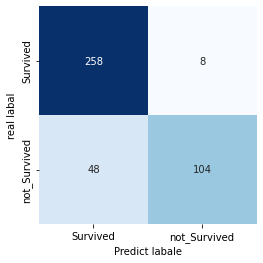

In [85]:
mat=confusion_matrix(y_test,y_pred_test)
labals=list(calss_dic.keys())
sns.heatmap(mat,square=True,annot=True,fmt='d',cbar=False,cmap='Blues',xticklabels=labals,yticklabels=labals)
plt.xlabel('Predict labale')
plt.ylabel('real labal')
print(classification_report(y_test,y_pred_test))

In [86]:
results = pd.DataFrame({
    'Model': [ 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Stochastic Gradient Decent', 
              'Decision Tree','LinearDiscriminantAnalysis',
              'QuadraticDiscriminantAnalysis','KNeighborsClassifier','svclassifier'],
    'Score': [ acc_logreg_test, 
              acc_random_forest_test, acc_gaussian_test, 
              acc_sgd_test, acc_decision_tree_test,acc_lda_test,acc_qda_test,acc_KNeighbors_test,acc_svclassifier_test]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

,Model
Score,
94.98,LinearDiscriminantAnalysis
92.34,Naive Bayes
90.67,Logistic Regression
87.08,Random Forest
86.60,svclassifier
86.36,Stochastic Gradient Decent
86.12,QuadraticDiscriminantAnalysis
82.54,Decision Tree
77.99,KNeighborsClassifier
